In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')

In [4]:
import toml
from pathlib import Path

In [5]:
path = Path("../data/raw/emnist")

In [6]:
!cat {path/"metadata.toml"}

filename = 'matlab.zip'
sha256 = 'e1fa805cdeae699a52da0b77c2db17f6feb77eed125f9b45c022e7990444df95'
url = 'https://s3-us-west-2.amazonaws.com/fsdl-public-assets/matlab.zip'


# Download dataset

**TODO**:
* First check if installed
* Check SHA after dwonload

In [7]:
file_name_extractor = lambda path: split(path)[1]

In [8]:
metadata = toml.load(path/"metadata.toml")

In [9]:
dataPath = path/metadata['filename'].split(".")[0]
if not dataPath.exists():
    !wget -O {path/metadata['filename']} {metadata['url']}
    !unzip {path/metadata['filename']} -d {path}
else:
    print("Data already downloaded")

Data already downloaded


# Read dataset

In [10]:
from scipy.io import loadmat

import json

In [11]:
data = loadmat(path/"matlab"/"emnist-byclass.mat")

with open("../lab9_sln/text_recognizer/datasets/emnist_essentials.json") as json_file:  
    mapping = json.load(json_file)["mapping"]
    mapping = {m[0]: m[1] for m in mapping}

In [12]:
# load training dataset
x_train = data["dataset"][0][0][0][0][0][0]
x_train = x_train.astype(np.float32)

# load training labels
y_train = data["dataset"][0][0][0][0][0][1]

Text(0.5, 1.0, 'label: Z')

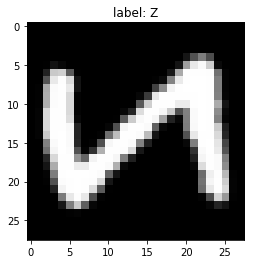

In [13]:
index = 0

plt.imshow(x_train[index].reshape(28, 28), cmap='gray')
plt.title(f"label: {mapping[y_train[index].item()]}")

In [14]:
# load test dataset
x_test = data["dataset"][0][0][1][0][0][0]
x_test = x_test.astype(np.float32)

# load test labels
y_test = data["dataset"][0][0][1][0][0][1]

In [15]:
# reshape using matlab order
x_train = x_train.reshape(-1, 28, 28, order="A")
x_test = x_test.reshape(-1, 28, 28, order="A")

Text(0.5, 1.0, 'label: Z')

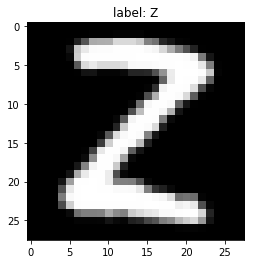

In [16]:
plt.imshow(x_train[index], cmap='gray')
plt.title(f"label: {mapping[y_train[index].item()]}")

In [17]:
x_train[index].shape

(28, 28)

# Explore the data

- How many iamges per class?
- Does the data need balancing?


In [18]:
number_of_classes = len(np.unique(y_train))
number_of_classes

62

In [19]:
from collections import Counter

labels_counter = Counter(list(map(int, y_train)))
labels_counter = {mapping[k]: v for k, v in labels_counter.items()}

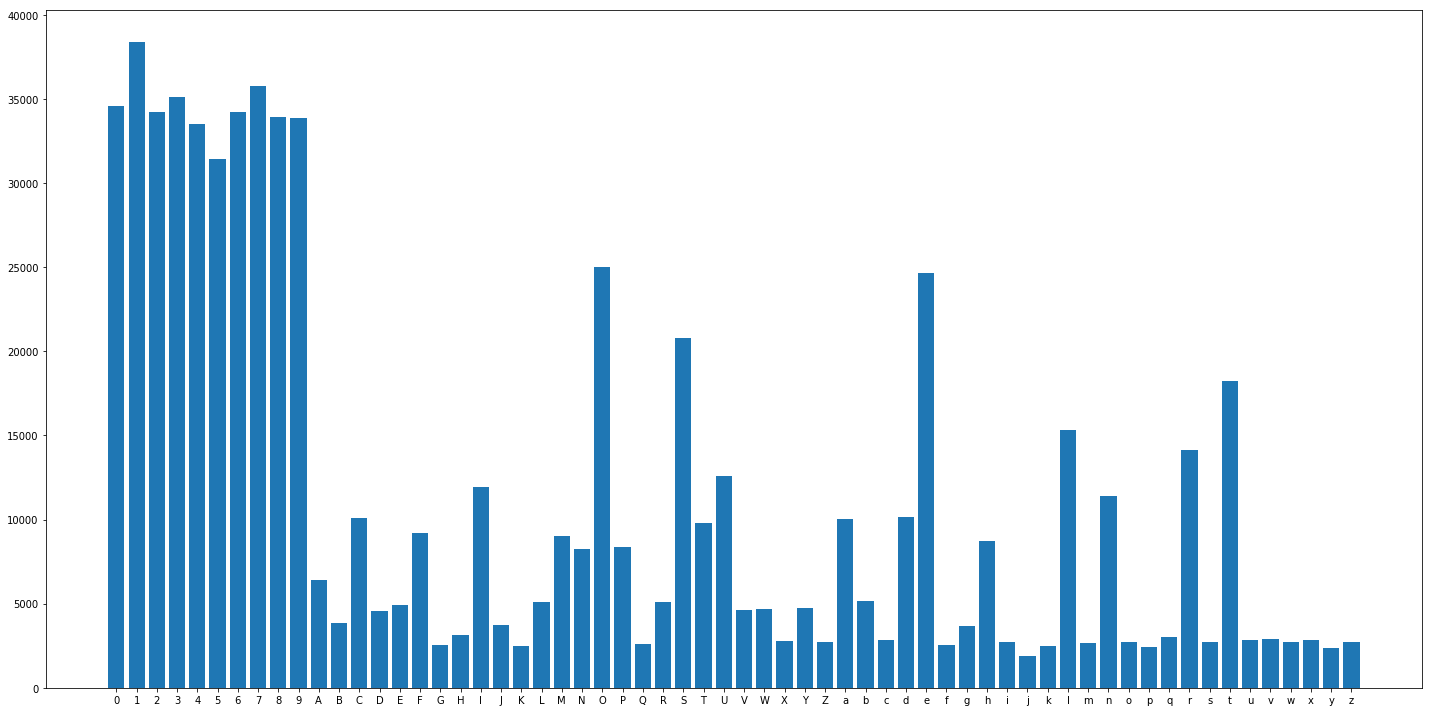

In [20]:
bars = list(map(str, labels_counter.keys()))
bars.sort()
counts = [labels_counter[bar] for bar in bars]

fig = plt.figure(figsize=(20, 10))

y_pos = np.arange(len(bars))
plt.bar(y_pos, counts)
plt.xticks(y_pos, bars)
fig.tight_layout()


In [21]:
min(counts)

1896

In [22]:
max(counts)

38374

In [23]:
int(np.mean(counts))

11256

# Balance data

In [52]:
def sample_to_balance(x, y):
    """Because the dataset is not balanced, we take at most the mean number of instances per class."""
    num_to_sample = int(np.bincount(y.flatten()).mean())
    print(f"num_to_sample :: {num_to_sample}")
    print("-------")
    
    all_sampled_inds = []
    for label in np.unique(y.flatten()):
        inds = np.where(y == label)[0]
        sampled_inds = np.unique(np.random.choice(inds, num_to_sample))
        print(f"label :: {mapping[label]}, sampled_inds :: {len(sampled_inds)}")
        all_sampled_inds.append(sampled_inds)
        
    ind = np.concatenate(all_sampled_inds)
    x_sampled = x[ind]
    y_sampled = y[ind]
    
    return x_sampled, y_sampled

In [53]:
x, y = sample_to_balance(x_train, y_train)

num_to_sample :: 11256
-------
label :: 0, sampled_inds :: 9586
label :: 1, sampled_inds :: 9762
label :: 2, sampled_inds :: 9558
label :: 3, sampled_inds :: 9678
label :: 4, sampled_inds :: 9540
label :: 5, sampled_inds :: 9480
label :: 6, sampled_inds :: 9628
label :: 7, sampled_inds :: 9682
label :: 8, sampled_inds :: 9546
label :: 9, sampled_inds :: 9532
label :: A, sampled_inds :: 5358
label :: B, sampled_inds :: 3677
label :: C, sampled_inds :: 6747
label :: D, sampled_inds :: 4177
label :: E, sampled_inds :: 4430
label :: F, sampled_inds :: 6428
label :: G, sampled_inds :: 2486
label :: H, sampled_inds :: 3053
label :: I, sampled_inds :: 7293
label :: J, sampled_inds :: 3560
label :: K, sampled_inds :: 2440
label :: L, sampled_inds :: 4561
label :: M, sampled_inds :: 6440
label :: N, sampled_inds :: 6201
label :: O, sampled_inds :: 9065
label :: P, sampled_inds :: 6235
label :: Q, sampled_inds :: 2566
label :: R, sampled_inds :: 4517
label :: S, sampled_inds :: 8665
label :: T, 

In [26]:
np.bincount(y.flatten())

array([9634, 9711, 9583, 9611, 9626, 9445, 9566, 9626, 9586, 9569, 5332,
       3669, 6827, 4190, 4413, 6457, 2487, 3063, 7266, 3564, 2438, 4538,
       6415, 6143, 9158, 6209, 2576, 4525, 8659, 6736, 7462, 4239, 4284,
       2713, 4303, 2659, 6756, 4565, 2792, 6807, 9053, 2527, 3514, 6321,
       2677, 1891, 2464, 8020, 2612, 7139, 2703, 2420, 2910, 7716, 2644,
       8421, 2790, 2840, 2649, 2760, 2343, 2683])

In [54]:
int(np.mean(y))

25